In [6]:
import sys
sys.path.append("../scripts")

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from seirsplus.models import *

In [2]:
plt.rcParams["figure.figsize"] = (14,6)

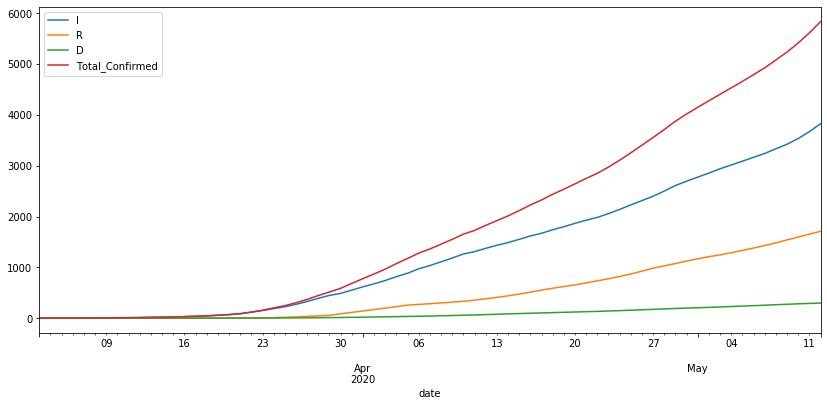

In [7]:
obs = pd.read_csv("../data/obs_arg.csv", parse_dates=["date"])
obs = obs.set_index("date")
obs = obs.rolling(window=7, min_periods=1).mean()
obs.plot()

In [8]:
obs = obs.drop(columns=["Total_Confirmed"])

In [60]:
train = obs["2020-04-01":"2020-04-30"].copy()
test = obs["2020-05-01":"2020-05-15"].copy()

In [61]:
train.head()

,I,R,D
date,,,
2020-04-01,617.428571,142.142857,19.571429
2020-04-02,676.142857,169.714286,23.428571
2020-04-03,741.285714,197.428571,27.142857
2020-04-04,816.857143,227.000000,30.714286
2020-04-05,884.428571,256.714286,34.285714


In [62]:
test.head()

,I,R,D
date,,,
2020-05-01,2775.714286,1168.428571,205.428571
2020-05-02,2855.571429,1209.857143,212.857143
2020-05-03,2939.857143,1245.142857,220.571429
2020-05-04,3014.000000,1288.285714,229.571429
2020-05-05,3089.142857,1332.571429,237.714286


In [ ]:
def fit(self, obs, estimate, weights=None, method="nelder-mead", options=None):
    obs = obs.reset_index()[["I", "R", "D"]]
    theta_0 = np.zeros(len(estimate))
    for k, param in enumerate(estimate):
        if param not in vars(self):
            raise Exception("Parameter not in model")
        theta_0[k] = vars(self)[param]
    if weights is None:
        weights = 1/obs.size * np.ones(obs.shape)
    args = (obs, weights, estimate)
    summary = minimize(self._opt_target, theta_0, args=args, method=method, options=options)
    return summary

In [182]:
def cost_function(theta, obs, weights, estimate):
    model = SEIRSModel(initN=44e6, beta=0, sigma=0, gamma=0, mu_I=0, initE=0, initI=initI, initR=initR, initF=initD)
    for k, param in enumerate(estimate):
        if param in vars(model):
            vars(model)[param] = theta[k]
    model.run(T=len(obs), dt=1)
    y_df = pd.DataFrame(data={"E":model.numE, "I":model.numI, "R":model.numR, "D":model.numF})
    y_df = y_df[1:].reset_index(drop=True) # model repeats initial value twice
    wsqd = weights * (y_df[obs.columns] - obs)**2
    cost = wsqd.sum().sum()
    return cost 

In [183]:
initI, initR, initD = train.head(1).to_numpy().flatten()

In [184]:
theta_0 = (0, 0, 0, 0, 0)

In [185]:
estimate = ("beta", "sigma", "gamma", "mu_I", "initE")

In [186]:
weights = 1/train.size * np.ones(train.shape)

In [187]:
args = (train.reset_index(drop=True), weights, estimate)

In [188]:
minimize(cost_function, theta_0, args=args, method="nelder-mead", options={"maxiter":1000})

t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00


t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00
t = 29.00


KeyboardInterrupt: 

In [75]:
def _opt_target(self, theta, obs, weights, estimate):
        for k, param in enumerate(estimate):
            if param in vars(self):
                vars(self)[param] = theta[k]
        y0 = np.concatenate(([self.initial_exposed], obs.head(1).to_numpy().flatten()))
        y = self.simulate(y0=y0, until=len(obs))[obs.columns]
        wsqd = weights * (y - obs)**2
        cost = wsqd.sum().sum()
        return cost

In [48]:
model = SEIRSModel(
    initN=44e6, beta=0.76, sigma=0.19, gamma=0.34, mu_I=0.02, initI=1, initR=0, initF=0, initE=0)

In [49]:
model.run(T=50, dt=0.5)

t = 49.50


True

In [54]:
model.numR

array([0.00000000e+00, 0.00000000e+00, 1.56519690e-01, 2.92112445e-01,
       4.14133235e-01, 5.27895958e-01, 6.37087311e-01, 7.44861337e-01,
       8.53326872e-01, 9.63924545e-01, 1.07807656e+00, 1.19701319e+00,
       1.32140721e+00, 1.45191942e+00, 1.58929583e+00, 1.73433227e+00,
       1.88756892e+00, 2.04948096e+00, 2.22062774e+00, 2.40164833e+00,
       2.59326149e+00, 2.79620431e+00, 3.01107024e+00, 3.23850925e+00,
       3.47924260e+00, 3.73406141e+00, 4.00382665e+00, 4.28946912e+00,
       4.59198947e+00, 4.91245762e+00, 5.25188260e+00, 5.61126766e+00,
       5.99171767e+00, 6.39443999e+00, 6.82074455e+00, 7.27204380e+00,
       7.74985272e+00, 8.25578883e+00, 8.79157220e+00, 9.35902540e+00,
       9.96007368e+00, 1.05975736e+01, 1.12737595e+01, 1.19899934e+01,
       1.27479500e+01, 1.35496162e+01, 1.43972910e+01, 1.52935862e+01,
       1.62414256e+01, 1.72440456e+01, 1.83049947e+01, 1.94281340e+01,
       2.06176369e+01, 2.18779890e+01, 2.32139884e+01, 2.46307455e+01,
      

In [51]:
len(model.tseries)

101

In [55]:
result = pd.DataFrame(data={"E":model.numE, "I":model.numI, "R":model.numR, "D":model.numF})

In [59]:
result[1:].reset_index(drop=True)

,E,I,R,D
0,0.000000,1.000000,0.000000,0.000000
1,0.333362,0.850778,0.156520,0.009207
2,0.591992,0.751670,0.292112,0.017183
3,0.798371,0.688844,0.414133,0.024361
4,0.968561,0.652493,0.527896,0.031053
...,...,...,...,...
95,223.374806,89.531959,265.124064,15.595533
96,236.377685,94.893363,280.734104,16.513771
97,250.183894,100.547463,297.275817,17.486813
98,264.878740,106.487091,314.815626,18.518566


In [42]:
result[:71][obs.columns] - obs.reset_index(drop=True)

,I,R,D
0,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000
2,-0.248330,0.292112,0.017183
3,-0.597507,0.527896,0.031053
4,-1.966094,0.744861,0.043815
...,...,...,...
66,-2670.236973,486.038263,-149.249850
67,-2679.861366,666.757752,-144.190720
68,-2704.031678,877.468461,-136.837990
69,-2738.188891,1121.198442,-126.895890


,E,I,R,D
0,0.000000,1.000000,0.000000,0.000000
1,0.000000,1.000000,0.000000,0.000000
2,0.591992,0.751670,0.292112,0.017183
3,0.968561,0.652493,0.527896,0.031053
4,1.242401,0.633906,0.744861,0.043815
...,...,...,...,...
66,1652.597275,663.191598,1967.752549,115.750150
67,1854.206109,742.710062,2206.757752,129.809280
68,2081.218488,831.254036,2475.039890,145.590582
69,2333.844914,931.668252,2775.198442,163.246967


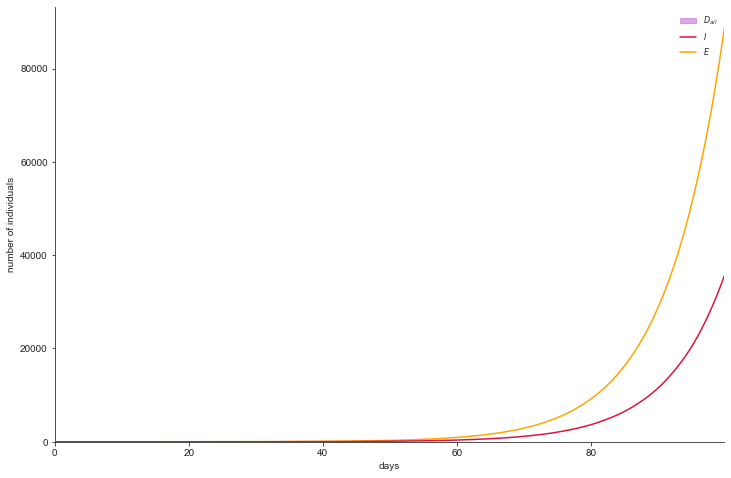

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1e339828ac8>)

In [18]:
model.figure_infections(plot_E="line", plot_I="line", plot_percentages=False)